In [2]:
import os
os.chdir("E:\College\EC VIDEOS\FRAMES2")

In [3]:
import pytesseract

In [4]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import cv2
cap = cv2.VideoCapture(0)
add="https:192.168.43.15:8080/video"
cap.open(add)
while(True):
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame123',gray)
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    contours,h = cv2.findContours(thresh,1,2)
    largest_rectangle = [0,0]
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
        if len(approx)==4: #polygons with 4 points is what I need.
            area = cv2.contourArea(cnt)
            if area > largest_rectangle[0]:
                #find the polygon which has the largest size.
                largest_rectangle = [cv2.contourArea(cnt), cnt, approx]

    x,y,w,h = cv2.boundingRect(largest_rectangle[1])
    #crop the rectangle to get the number plate.
    roi=frame[y:y+h,x:x+w]
    cv2.drawContours(frame,[largest_rectangle[1]],0,(0,0,255),-1)
    plt.imshow(roi, cmap = 'gray')
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    text = pytesseract.image_to_string(roi)
    if(text):
        print(text)
    if cv2.waitKey(1) & 0xFF == ord('f'):
        text = pytesseract.image_to_string(roi)
        break
cap.release()
cv2.destroyAllWindows()        



| |
oe
| |
|
.
Se
Jd
ieee
me 200 cr eA.
“@ 300 SL 195
“@ 300 SL 195
“300 SL 195
A wi meee ERLE
Md 300 SL 1957
eas

anernv
i 300 SL 1957
“300 SL 1957
“@ 300 SL 1957
“i 300 SL 1957
i“ 300 SL 1957
“@ 300 S| 1057
Pa ee

~_rr
a S—<“ ttt”
ee a bn a er oe ee,
i 300 SL 1957.
i) 300 SL 1957
wa 300 SL 1957
i 300 SL 1957
Mi 300 SL 1957
Fa a ee anrnmht
il 300 SL 1957
sl 300 SL 1957
“300 SL 1957
“@ 300 SL 1957
300 Sai
300 SL 1s
ae
hi
\ pee
aid: Object
yey im

aid: Object
|
ed eee
et ee |
i

acetal lh tet

—
ee ee tet |
ADD DARREY
r Veena ye. |!

id: Object
SS
.
.
.


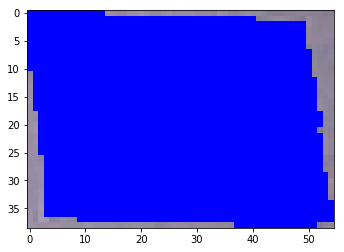

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import cv2
cap = cv2.VideoCapture(0)
while(True):
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame123',gray)
    c_edge = cv2.Canny(gray, 170, 200) 
    contours,h = cv2.findContours(c_edge,1,2)
    largest_rectangle = [0,0]
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
        if len(approx)==4: #polygons with 4 points is what I need.
            area = cv2.contourArea(cnt)
            if area > largest_rectangle[0]:
                #find the polygon which has the largest size.
                largest_rectangle = [cv2.contourArea(cnt), cnt, approx]

    x,y,w,h = cv2.boundingRect(largest_rectangle[1])
    #crop the rectangle to get the number plate.
    roi=frame[y:y+h,x:x+w]
    cv2.drawContours(frame,[largest_rectangle[1]],0,(0,0,255),-1)
    plt.imshow(roi, cmap = 'gray')
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    text = pytesseract.image_to_string(roi)
    if(text):
        print(text)
    if cv2.waitKey(1) & 0xFF == ord('f'):
        text = pytesseract.image_to_string(roi)
        break
cap.release()
cv2.destroyAllWindows()        



In [5]:
print(text)

In [7]:
def main():
    import numpy as np
    import cv2
    import imutils
    import sys
    import pandas as pd
    import time
    cap = cv2.VideoCapture(0)
    add="https:192.168.43.15:8080/video"
    cap.open(add)
    while(True):
        ret,img = cap.read()
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame123',gray)
        pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'
        img = imutils.resize(img, width=500)
        cv2.imshow("Original Image", img)  #Show the original image
        cv2.waitKey(0)
        gray_img = cv2.bilateralFilter(gray, 11, 17, 17)
        cv2.imshow("Preprocess 2 - Bilateral Filter", gray_img)    #Showing the preprocessed image.
        cv2.waitKey(0)
        c_edge = cv2.Canny(gray_img, 170, 200)
        cv2.imshow("Preprocess 3 - Canny Edges", c_edge)        #Showing the preprocessed image.
        cv2.waitKey(0)
        cnt, new = cv2.findContours(c_edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        cnt = sorted(cnt, key = cv2.contourArea, reverse = True)[:30]
        NumberPlateCount = 0
        im2 = img.copy()
        cv2.drawContours(im2, cnt, -1, (0,255,0), 3)
        cv2.imshow("Top 30 Contours", im2)          #Show the top 30 contours.
        cv2.waitKey(0)
        count = 0
        for c in cnt:
            perimeter = cv2.arcLength(c, True)      #Getting perimeter of each contour
            approx = cv2.approxPolyDP(c, 0.02 * perimeter, True)
            if len(approx) == 4:            #Selecting the contour with 4 corners/sides.
                NumberPlateCount = approx
                break
        masked = np.zeros(gray_img.shape,np.uint8)
        new_image = cv2.drawContours(masked,[NumberPlateCount],0,255,-1)
        new_image = cv2.bitwise_and(new_image,new_image,mask=masked)
        cv2.imshow("4 - Final_Image",new_image)  
        cv2.waitKey(0)
        configr = ('-l eng --oem 1 --psm 3')
        text_no = pytesseract.image_to_string(new_image, config=configr)
        data = {'Date': [time.asctime(time.localtime(time.time()))],
            'Vehicle_number': [text_no]}
        df = pd.DataFrame(data, columns = ['Date', 'Vehicle_number'])
        df.to_csv('Dataset_VehicleNo.csv')
        print(text_no)
        cv2.waitKey(0)
        flag=0
        import seaborn as sn 
        data=pd.read_csv(r"C:\Users\user\Documents\MATLAB\testdata.csv")
        reg=data['Registration Number']
        abc=text_no
        for idx,i in enumerate(reg):
            if(i==abc):
                print(data.loc[idx,:])
                flag=1
        if(flag==0):
            print("Not registered")
            print(text_no)
        if cv2.waitKey(1) & 0xFF == ord('f'):
            break        
    cap.release()
    cv2.destroyAllWindows()    
if __name__ == '__main__':
    main()
    

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [7]:
def main():
    import numpy as np
    import cv2
    import imutils
    import sys
    import pytesseract
    import pandas as pd
    import time
    pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'
    img = cv2.imread("9.jpg")
    img = imutils.resize(img, width=500)
    cv2.imshow("Original Image", img)  #Show the original image
    cv2.waitKey(0)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imshow("Preprocess 1 - Grayscale Conversion", gray_img)        #Show modification.
    cv2.waitKey(0)
    gray_img = cv2.bilateralFilter(gray_img, 11, 17, 17)
    cv2.imshow("Preprocess 2 - Bilateral Filter", gray_img)    #Showing the preprocessed image.
    cv2.waitKey(0)
    c_edge = cv2.Canny(gray_img, 170, 200)
    cv2.imshow("Preprocess 3 - Canny Edges", c_edge)        #Showing the preprocessed image.
    cv2.waitKey(0)
    cnt, new = cv2.findContours(c_edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnt = sorted(cnt, key = cv2.contourArea, reverse = True)[:30]
    NumberPlateCount = None
    im2 = img.copy()
    cv2.drawContours(im2, cnt, -1, (0,255,0), 3)
    cv2.imshow("Top 30 Contours", im2)          #Show the top 30 contours.
    cv2.waitKey(0)
    count = 0
    for c in cnt:
        perimeter = cv2.arcLength(c, True)      #Getting perimeter of each contour
        approx = cv2.approxPolyDP(c, 0.02 * perimeter, True)
        if len(approx) == 4:            #Selecting the contour with 4 corners/sides.
            NumberPlateCount = approx
            break
    masked = np.zeros(gray_img.shape,np.uint8)
    new_image = cv2.drawContours(masked,[NumberPlateCount],0,255,-1)
    new_image = cv2.bitwise_and(img,img,mask=masked)
    cv2.imshow("4 - Final_Image",new_image)  
    cv2.waitKey(0)
    configr = ('-l eng --oem 1 --psm 3')
    text_no = pytesseract.image_to_string(new_image, config=configr)
    data = {'Date': [time.asctime(time.localtime(time.time()))],
        'Vehicle_number': [text_no]}
    df = pd.DataFrame(data, columns = ['Date', 'Vehicle_number'])
    df.to_csv('Dataset_VehicleNo.csv')
    print(text_no)
    cv2.waitKey(0)
    flag=0
    import seaborn as sn 
    data=pd.read_csv(r"C:\Users\user\Documents\MATLAB\testdata.csv")
    reg=data['Registration Number']
    abc=text_no
    for idx,i in enumerate(reg):
        if(i==abc):
            print(data.loc[idx,:])
            flag=1
    if(flag==0):
        print("Not registered")
if __name__ == '__main__':
    main()

TN 66 V 1548
Registration Number    TN 66 V 1548
Date                     24-01-2020
IN                             8.19
OUT                            2.14
Register                          R
S/T                               S
Name: 11, dtype: object


In [7]:
import cv2
cap = cv2.VideoCapture(0)

while(True):
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame123',gray)
    if cv2.waitKey(1) & 0xFF == ord('f'):
        break
cap.release()
cv2.destroyAllWindows()

In [8]:
def main():
    import numpy as np
    import cv2
    import imutils
    import sys
    import pandas as pd
    import time
    cap = cv2.VideoCapture(0)
    add="https:192.168.43.15:8080/video"
    cap.open(add)
    while(True):
        ret,img = cap.read()
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'
        img = imutils.resize(img, width=500)
        gray_img = cv2.bilateralFilter(gray, 11, 17, 17)
        c_edge = cv2.Canny(gray_img, 170, 200)
        cnt, new = cv2.findContours(c_edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        cnt = sorted(cnt, key = cv2.contourArea, reverse = True)[:30]
        NumberPlateCount = 0
        im2 = img.copy()
        cv2.drawContours(im2, cnt, -1, (0,255,0), 3)
        cv2.imshow("Top 30 Contours", im2)         
        cv2.waitKey(0)
        count = 0
        for c in cnt:
            perimeter = cv2.arcLength(c, True)     
            approx = cv2.approxPolyDP(c, 0.02 * perimeter, True)
            if len(approx) == 4:            
                NumberPlateCount = approx
                break
        masked = np.zeros(gray_img.shape,np.uint8)
        new_image = cv2.drawContours(masked,[NumberPlateCount],0,255,-1)
        new_image = cv2.bitwise_and(new_image,new_image,mask=masked)
        cv2.imshow("4 - Final_Image",new_image)  
        cv2.waitKey(0)
        configr = ('-l eng --oem 1 --psm 3')
        text_no = pytesseract.image_to_string(new_image, config=configr)
        if(text_no):    
            print(text_no)
        if cv2.waitKey(1) & 0xFF == ord('f'):
            break        
    cap.release()
    cv2.destroyAllWindows()    
if __name__ == '__main__':
    main()
        

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2509: error: (-215:Assertion failed) npoints > 0 in function 'cv::drawContours'


In [8]:
import urllib.request
import cv2
import numpy as np
import time
URL = "http://192.168.43.61:8080/"
while True:
    img_arr = np.array(bytearray(urllib.request.urlopen(URL).read()),dtype=np.uint8)
    img = cv2.imdecode(img_arr,-1)
    cv2.imshow('IPWebcam',img)
    
    if cv2.waitKey(1):
        break

KeyboardInterrupt: 